In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

import data_manipulation as dm 
import data_visualization as dv 
import data_dictionary as dd
import data_preprocessing as dp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [4]:
pd.set_option('display.max_rows', 120)

In [5]:
file_name = 'cleaned_data'
data = pd.read_excel('/content/'+file_name+'.xlsx')
data.head()

,Unnamed: 0,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Object points,Other sizing method,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,...,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,0,2015,1,1,16,7,13,2.0,3.0,1,7,100.0,2,2112,3168.0,8,4.0,1,2.0,1.0,8.0,3.0,4.0,4,1,2.0,1.75,2,1.888889,2.587302,4.555556,2.0,3.0,0,2.0,...,2.0,2.0,1.0,3.0,6,6,8,1.0,16.666667,2.0,3.0,2.0,1.0,7.0,2,1,1,1,1.0,1,3.0,5.0,3.0,3.0,1.888889,NaN,1.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0
1,1,2016,5,1,2,1,2,2.0,3.0,1,3,19.0,2,1056,1584.0,4,4.0,3,1.0,2.0,6.0,3.0,7.0,4,1,4.0,2.50,2,1.888889,2.904762,4.555556,1.0,3.0,0,2.0,...,2.0,2.0,2.0,3.0,3,3,8,1.0,0.000000,6.0,4.0,2.0,1.0,8.0,1,2,5,1,1.0,1,3.0,5.0,3.0,3.0,4.555556,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0
2,2,2008,5,3,2,2,3,3.0,5.0,1,3,64.0,3,3168,5280.0,4,5.0,2,3.0,4.0,6.0,3.0,6.0,1,0,6.0,2.00,2,1.888889,1.000000,1.888889,2.0,2.0,1,4.0,...,1.0,2.0,2.0,2.0,6,6,8,1.0,0.000000,5.0,2.0,1.0,1.0,8.0,3,1,3,1,1.0,0,3.0,5.0,2.0,3.0,1.444444,3.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,2.0,3.0
3,3,2009,4,2,3,2,4,6.0,6.0,1,7,246.0,5,5280,5280.0,2,4.0,1,1.0,1.0,4.0,3.0,6.0,4,1,3.0,3.25,2,5.000000,2.507937,1.000000,1.0,1.0,1,4.0,...,1.0,4.0,4.0,2.0,6,4,8,2.0,0.000000,1.0,2.0,1.0,1.0,4.0,2,1,4,2,2.0,0,1.0,3.0,1.0,2.0,1.444444,1.0,1.0,3.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0
4,4,2016,4,2,3,2,4,12.0,24.0,1,7,420.0,5,19008,38016.0,3,4.0,3,1.0,2.0,3.0,3.0,2.0,4,1,3.0,2.75,2,1.888889,4.650794,1.000000,1.0,2.0,1,4.0,...,1.0,4.0,4.0,3.0,9,9,8,1.0,44.444444,2.0,3.0,1.0,1.0,4.0,2,3,24,2,1.0,0,3.0,3.0,1.0,3.0,1.000000,1.0,1.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0


In [6]:
df = data.copy()
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.shape

(120, 70)

# Dropping irrelevant columns

In [7]:
df.drop(['Year of project', 'Estimated effort', 'Estimated duration']
        , axis = 1, inplace = True)

In [8]:
categorical_columns = [col for col in dd.categorical_cols_names() if col in df.columns]
numerical_columns = [col for col in df.columns if col not in categorical_columns]
numerical_columns.remove('Actual effort')

In [9]:
continous_columns = ['Process reengineering', 'Team continuity', 'Requirements flexibility', 
                     'Requirment stability', 'Users stability', 'User resistance', 'Actual duration']
discrete_columns = [col for col in numerical_columns if col not in continous_columns]

# Data Imputation

## Categorical Columns Imputation

In [10]:
null_categorical_columns = dp.missing_values_columns(df[categorical_columns])
null_categorical_columns

Index(['Comments within the code', 'Consultant availability',
       'Degree of software reuse', 'Developer hiring policy',
       'Developer training', 'Government policy impact', 'Income satisfaction',
       'Level of outsourcing', 'Organization management structure clarity',
       'Product complexity', 'Programmers experience in programming language',
       'Project manager experience', 'Reliability requirements',
       'Required reusability', 'Requirement accuracy level',
       'Schedule quality', 'Software tool experience', 'Specified H/W',
       'Team selection', 'Technical documentation', 'Use of standards',
       'User manual'],
      dtype='object')

In [11]:
for col in null_categorical_columns:
  df[col].fillna(df[col].mode()[0], inplace = True)

## Discrete Columns Imputation




In [12]:
null_discrete_columns = dp.missing_values_columns(df[discrete_columns])
null_discrete_columns

Index(['Object points', 'Developer incentives policy',
       'Development team management', 'Clarity of manual system',
       'Precedentedness', 'Programmers capability', 'Analysts capability',
       'Team contracts', 'Team cohesion', 'Development environment adequacy',
       'Tool availability', 'Technical stability', 'Degree of risk management',
       'Performance requirements', 'Security requirements'],
      dtype='object')

In [13]:
for col in null_discrete_columns:
  df[col].fillna(df[col].mode()[0], inplace = True)
  df[col].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


## Continous Columns Imputation


In [14]:
null_continous_columns = dp.missing_values_columns(df[continous_columns])
null_continous_columns

Index(['Process reengineering', 'Team continuity'], dtype='object')

In [15]:
for col in null_continous_columns:
  df[col].fillna(df[col].mean(), inplace = True)

## Final Missing Values HeatMap

Text(0.5, 1.0, 'Missing values heatmap')

<Figure size 1440x1440 with 0 Axes>

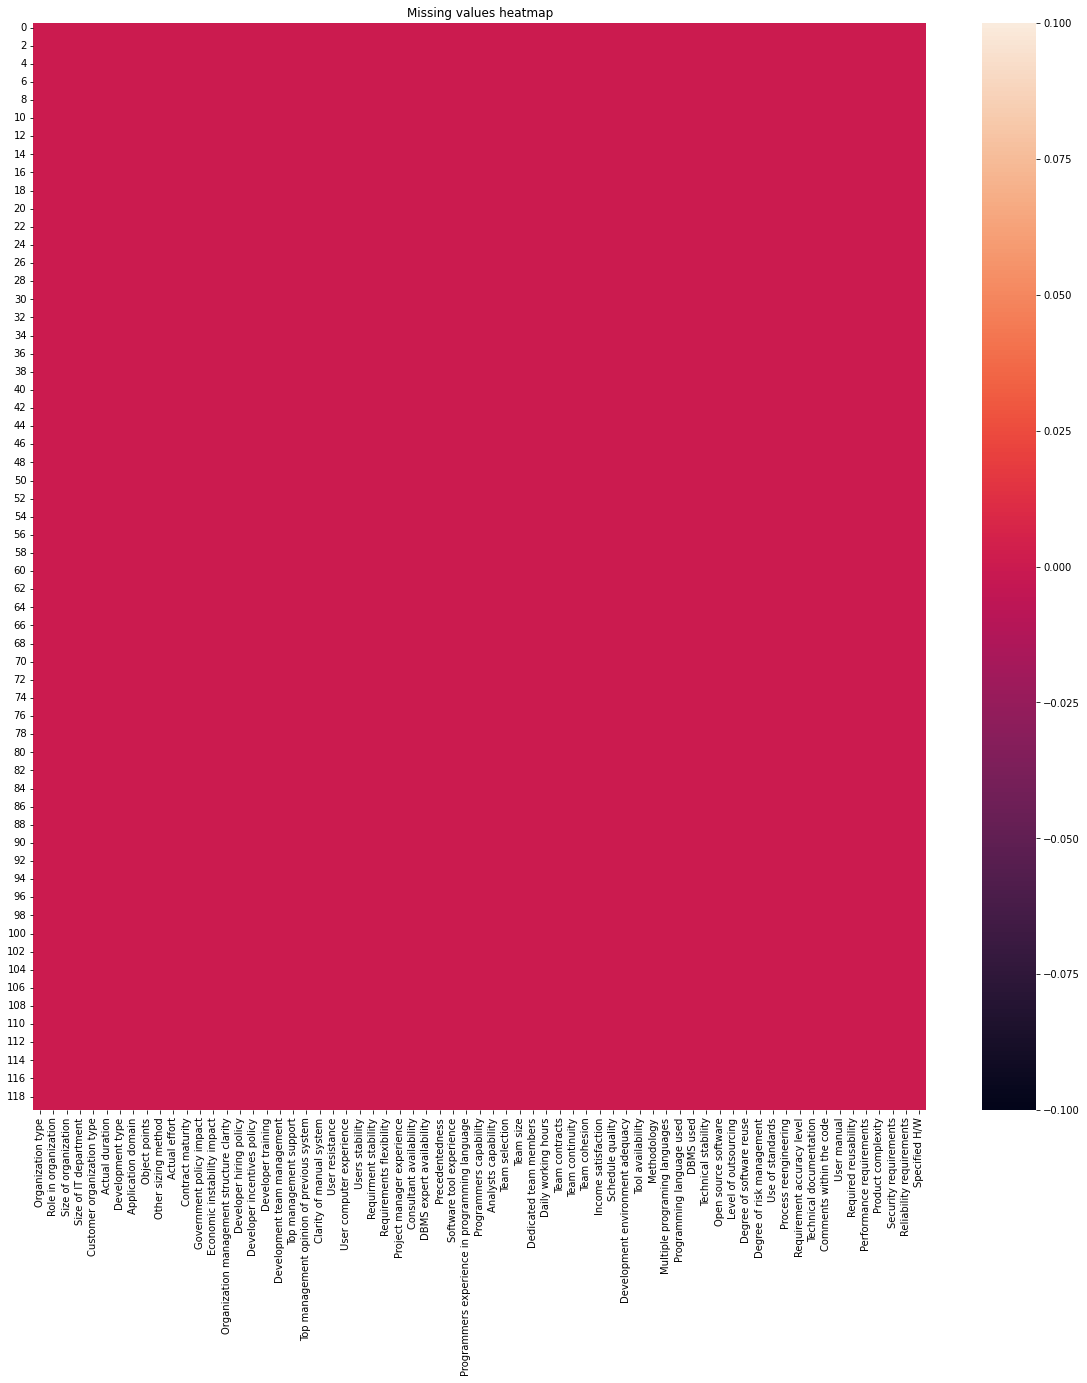

In [16]:
plt.figure(figsize = (20, 20))
dv.missing_values_map(df)
plt.title('Missing values heatmap')

# Features Anomaly treatment

In [17]:
df['Size of organization'] = df['Size of organization'].replace({17: 16})
df['Customer organization type'] = df['Customer organization type'].replace({17: 16})
df['Required reusability'] = df['Required reusability'].replace({5: 4})

# Dropping low variance Features

In [18]:
variances = np.round(df.var().sort_values(ascending = False), 2)
variances[20:]

Users stability                                   1.83
DBMS used                                         1.83
User manual                                       1.81
Software tool experience                          1.71
Methodology                                       1.63
Developer hiring policy                           1.60
Economic instability impact                       1.57
Degree of software reuse                          1.53
Requirement accuracy level                        1.47
Required reusability                              1.41
Process reengineering                             1.38
Reliability requirements                          1.34
Programmers experience in programming language    1.34
Top management support                            1.28
Government policy impact                          1.23
Technical documentation                           1.23
Requirment stability                              1.22
Precedentedness                                   1.12
Role in or

In [19]:
df.drop(list(variances[variances < 0.3].index), axis = 1, inplace = True)

# F regression test for numerical columns

In [20]:
from sklearn.feature_selection import f_regression

In [21]:
categorical_columns = [col for col in dd.categorical_cols_names() if col in df.columns]
numerical_columns = [col for col in df.columns if col not in categorical_columns]
numerical_columns.remove('Actual effort')

In [22]:
scores = {'Score': f_regression(df[numerical_columns], df['Actual effort'])[0], 'p-value': np.round(f_regression(df[numerical_columns], df['Actual effort'])[1], 4)}
scores = pd.DataFrame(scores, index = numerical_columns).sort_values('p-value', ascending = True)
scores.head(20)

,Score,p-value
Actual duration,21.600395,0.0000
Object points,92.832488,0.0000
Dedicated team members,280.423008,0.0000
Team size,287.441018,0.0000
Requirment stability,11.883554,0.0008
Technical stability,9.598140,0.0024
Team cohesion,9.437774,0.0026
Tool availability,8.008831,0.0055
Economic instability impact,7.151680,0.0086
Developer incentives policy,7.073320,0.0089


In [23]:
columns_to_drop = scores[scores['p-value'] > 0.05].index
columns_to_drop

Index(['Team continuity', 'Security requirements', 'Requirements flexibility',
       'Top management support', 'Team contracts', 'Analysts capability',
       'Programmers capability', 'Degree of risk management',
       'User computer experience', 'Development team management',
       'Process reengineering', 'Other sizing method',
       'Performance requirements', 'Daily working hours',
       'Clarity of manual system'],
      dtype='object')

In [24]:
df.drop(list(columns_to_drop), axis = 1, inplace = True)

# Anova test for categorical columns

In [25]:
from sklearn.feature_selection import f_classif

In [26]:
scores = {'Score': f_classif(df[categorical_columns], df['Actual effort'])[0], 'p-value': np.round(f_classif(df[categorical_columns], df['Actual effort'])[1], 4)}
scores = pd.DataFrame(scores, index = categorical_columns).sort_values('p-value', ascending = True)
scores.head(10)

,Score,p-value
Role in organization,3.962587,0.0000
Development type,2.947634,0.0001
Size of organization,1.908943,0.0087
Requirement accuracy level,1.791512,0.0158
Comments within the code,1.502720,0.0657
DBMS used,1.486243,0.0710
Programmers experience in programming language,1.486493,0.0710
Required reusability,1.414703,0.0992
Size of IT department,1.392763,0.1097
Programming language used,1.351186,0.1322


In [27]:
columns_to_drop = scores[scores['p-value'] > 0.05].index
columns_to_drop

Index(['Comments within the code', 'DBMS used',
       'Programmers experience in programming language',
       'Required reusability', 'Size of IT department',
       'Programming language used', 'Specified H/W', 'Application domain',
       'Developer training', 'Government policy impact',
       'Degree of software reuse', 'User manual', 'Software tool experience',
       'Technical documentation', 'Organization management structure clarity',
       'Reliability requirements', 'Project manager experience',
       'Team selection', 'Customer organization type', 'Income satisfaction',
       'Developer hiring policy', 'Methodology', 'Product complexity',
       'Schedule quality', 'Consultant availability', 'Organization type'],
      dtype='object')

In [28]:
df.drop(list(columns_to_drop), axis = 1, inplace = True)

In [29]:
df.head()

,Role in organization,Size of organization,Actual duration,Development type,Object points,Actual effort,Contract maturity,Economic instability impact,Developer incentives policy,User resistance,Users stability,Requirment stability,Precedentedness,Team size,Dedicated team members,Team cohesion,Development environment adequacy,Tool availability,Technical stability,Requirement accuracy level
0,1,16,3.0,1,100.0,3168.0,8,1,8.0,1.75,1.888889,2.587302,2.0,6,6,2.0,1.0,7.0,1.0,1.0
1,1,2,3.0,1,19.0,1584.0,4,3,6.0,2.50,1.888889,2.904762,2.0,3,3,6.0,1.0,8.0,1.0,2.0
2,3,2,5.0,1,64.0,5280.0,4,2,6.0,2.00,1.888889,1.000000,4.0,6,6,5.0,1.0,8.0,1.0,3.0
3,2,3,6.0,1,246.0,5280.0,2,1,4.0,3.25,5.000000,2.507937,4.0,6,4,1.0,1.0,4.0,2.0,1.0
4,2,3,24.0,1,420.0,38016.0,3,3,3.0,2.75,1.888889,4.650794,4.0,9,9,2.0,1.0,4.0,1.0,1.0


# OneHot Encoding

In [30]:
categorical_cols = [col for col in df.columns if col in dd.categorical_cols_names()]

In [31]:
for col in categorical_cols:
  df[col].replace(dd.values_meaning(col), inplace = True)

In [32]:
onehot_encoder = OneHotEncoder()
transformed = onehot_encoder.fit_transform(df[['Role in organization', 'Development type', 'Size of organization', 'Requirement accuracy level']])
one_hot_columns = [col[3::] for col in onehot_encoder.get_feature_names()]
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(data = transformed.todense(), columns = one_hot_columns)
df = pd.concat([df.drop(['Role in organization', 'Development type', 'Size of organization', 'Requirement accuracy level'], axis = 1), ohe_df], axis = 1)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Actual duration,Object points,Actual effort,Contract maturity,Economic instability impact,Developer incentives policy,User resistance,Users stability,Requirment stability,Precedentedness,Team size,Dedicated team members,Team cohesion,Development environment adequacy,Tool availability,Technical stability,Company manager,Developer,Planning coordinator,Project manager,System administrator,Technical consultant,Technical manager,Customization of imported software,Modifying existing software,New software development,Upgrading existing software,1-5,101-150,11-20,151-200,21-30,31-40,351-400,41-50,51-100,6-10,>500,Accurate requirements specifications used to develop the software system,Inaccurate requirements specifications and required re-programming the software system,Inaccurate requirements specifications and required the re-analysis of the software requirements,Inaccurate requirements specifications and required the re-design of the software system
0,3.0,100.0,3168.0,8,1,8.0,1.75,1.888889,2.587302,2.0,6,6,2.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,3.0,19.0,1584.0,4,3,6.0,2.50,1.888889,2.904762,2.0,3,3,6.0,1.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5.0,64.0,5280.0,4,2,6.0,2.00,1.888889,1.000000,4.0,6,6,5.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,6.0,246.0,5280.0,2,1,4.0,3.25,5.000000,2.507937,4.0,6,4,1.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24.0,420.0,38016.0,3,3,3.0,2.75,1.888889,4.650794,4.0,9,9,2.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Polynomial Transformation Process

In [33]:
target = df['Actual effort']
df.drop(['Actual effort'], axis = 1, inplace = True)
original_columns = list(df.columns)

In [34]:
df = dp.PolynomialFeatures_labeled(df, 3)

In [35]:
for col in original_columns:
  df.drop([col+'**2', col+'**3'], axis = 1, inplace = True)

In [36]:
df.drop([col for col in df.columns if df[col].min() == 0 and df[col].max() == 0], axis = 1, inplace = True)

In [37]:
corrs = df.corr() == 1 
boolean = corrs.sum() > 1 
indexes = boolean[boolean == True].index
for col in indexes:
  if col not in df.columns:
    pass
  else:
    corrs = df.corr()[col].sort_values(ascending = False) 
    indexes2 = list(corrs[corrs == 1].index)
    if len(indexes2) > 1:
      indexes2.remove(col)
      df.drop(indexes2, axis = 1, inplace = True)

In [38]:
df = pd.concat([df, target], axis = 1)

In [39]:
df.head()

,Constant Term,Actual duration**1,Object points**1,Contract maturity**1,Economic instability impact**1,Developer incentives policy**1,User resistance**1,Users stability**1,Requirment stability**1,Precedentedness**1,Team size**1,Dedicated team members**1,Team cohesion**1,Development environment adequacy**1,Tool availability**1,Technical stability**1,Company manager**1,Developer**1,Planning coordinator**1,Project manager**1,System administrator**1,Technical consultant**1,Technical manager**1,Customization of imported software**1,Modifying existing software**1,New software development**1,Upgrading existing software**1,1-5**1,101-150**1,11-20**1,151-200**1,21-30**1,31-40**1,351-400**1,41-50**1,...,Project manager**1 x Customization of imported software**1 x >500**1,Project manager**1 x Customization of imported software**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x Customization of imported software**1 x Inaccurate requirements specifications and required re-programming the software system**1,Project manager**1 x Modifying existing software**1 x >500**1,Project manager**1 x Modifying existing software**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x New software development**1 x 1-5**1,Project manager**1 x New software development**1 x 11-20**1,Project manager**1 x New software development**1 x >500**1,Project manager**1 x New software development**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x New software development**1 x Inaccurate requirements specifications and required re-programming the software system**1,Project manager**1 x New software development**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Project manager**1 x Upgrading existing software**1 x >500**1,Project manager**1 x Upgrading existing software**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x 1-5**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x 11-20**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x 11-20**1 x Inaccurate requirements specifications and required the re-design of the software system**1,Project manager**1 x 21-30**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x 6-10**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x 6-10**1 x Inaccurate requirements specifications and required re-programming the software system**1,Project manager**1 x 6-10**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Project manager**1 x 6-10**1 x Inaccurate requirements specifications and required the re-design of the software system**1,Project manager**1 x >500**1 x Accurate requirements specifications used to develop the software system**1,Project manager**1 x >500**1 x Inaccurate requirements specifications and required re-programming the software system**1,Project manager**1 x >500**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Technical consultant**1 x New software development**1 x >500**1,Technical consultant**1 x New software development**1 x Accurate requirements specifications used to develop the software system**1,Technical consultant**1 x >500**1 x Accurate requirements specifications used to develop the software system**1,Customization of imported software**1 x >500**1 x Accurate requirements specifications used to develop the software system**1,New software development**1 x 1-5**1 x Accurate requirements specifications used to develop the software system**1,New software development**1 x 11-20**1 x Accurate requirements specifications used to develop the software system**1,New sof

# Saving data

In [40]:
df.to_excel('/content/preprocessed_data.xlsx')